In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from Code.Tutorial.Dataset  import load_scg
from DTW import dtwPlotTwoWay, dtw_easy
import random

In [2]:
def std_data(noise_level):
    signals_train_l, labels_train_l, duration, fs = load_scg(noise_level, 'train')
    signals_test_l, labels_test_l, _, _ = load_scg(noise_level, 'test')

    signals_l_train_ls = []
    labels_l_train_ls = []
    for cnt, signal in enumerate(signals_train_l):
        if max(signal) > 1:
            continue
        signals_l_train_ls.append(signal)
        labels_l_train_ls.append(labels_train_l[cnt])

    signals_l_test_ls = []
    labels_l_test_ls = []
    for cnt, signal in enumerate(signals_test_l):
        if max(signal) > 1:
            continue
        signals_l_test_ls.append(signal)
        labels_l_test_ls.append(labels_test_l[cnt])


    signals_l_train = np.array(signals_l_train_ls)
    signals_l_test = np.array(signals_l_test_ls)
    labels_l_train = np.array(labels_l_train_ls)
    labels_l_test = np.array(labels_l_test_ls)
    print(signals_l_train.shape, labels_l_test.shape)

    return labels_l_train, labels_l_test, signals_l_train, signals_l_test

In [3]:
def segmentation(signal, rpeak):
    begin, end = 0, 0
    margin = rpeak[0]
    pieces = []

    plt.figure()
    for num in range(1, len(rpeak)):
        begin = end
        end = rpeak[num] - margin
        pieces.append(signal[begin: end])
        plt.plot(signal[begin: end])
    plt.show()
    return pieces

In [17]:
def extract_dtw(signals, labels, alpha, cnt, show = True):
        signal, hr = signals[cnt], labels[cnt, 2]

        largepeaks, _ = find_peaks(signal, height=np.max(signal)*0.3, distance=5000//(hr*alpha))
        pieces = segmentation(signal, largepeaks)

        iter_n = 10
        n = 0
        while n < iter_n:
            piece0, piece1 = random.choice(pieces)[::-1], random.choice(pieces)[::-1]
            d, cost_matrix, acc_cost_matrix, path = dtw_easy(piece0, piece1, lambda x, y: np.abs(x - y), s=1)

            if show:
                def draw_piece_peaks(piece):
                    piece_peaks_, _ = find_peaks(piece, height=np.max(piece)*0.1, distance=len(piece)*0.15)
                    piece_peaks = []

                    if len(piece_peaks_) == 2:
                        piece_peaks = piece_peaks_
                    elif len(piece_peaks_) > 2:
                        mmax = np.argmax(piece[piece_peaks_])
                        piece_peaks.append(piece_peaks_[mmax])
                        piece_peaks_ = np.delete(piece_peaks_, mmax)
                        mmax2 = np.argmax(piece[piece_peaks_])
                        piece_peaks.append(piece_peaks_[mmax2])
                    elif len(piece_peaks_) < 2:
                        return None

                    plt.figure()
                    plt.plot(piece)
                    plt.scatter(piece_peaks, piece[piece_peaks])
                    plt.show()

                # draw_piece_peaks(piece0)
                # draw_piece_peaks(piece1)
                dtwPlotTwoWay(path[0], path[1], piece0, piece1, 0, 4e-6, 'gray')

                # plt.figure()
                # plt.plot(piece0)
                # plt.plot(piece1)
                # plt.show()
            n += 1

(4718, 1000) (2822, 6)
(4718, 1000) (2822, 6)


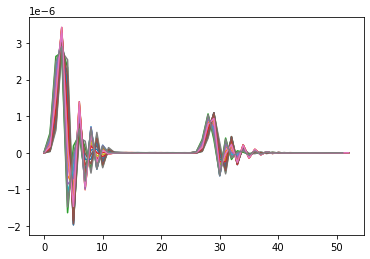

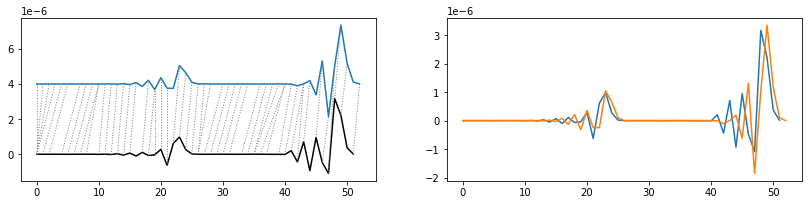

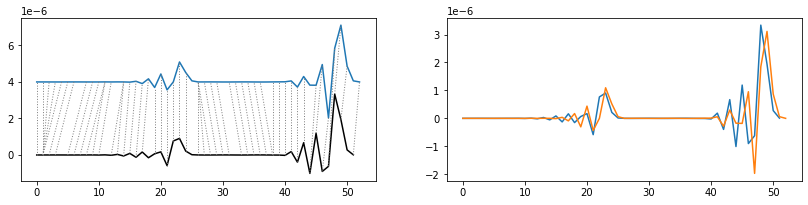

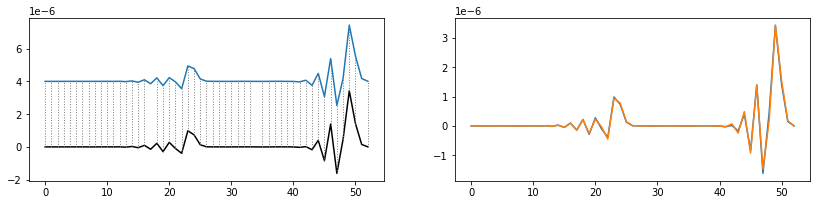

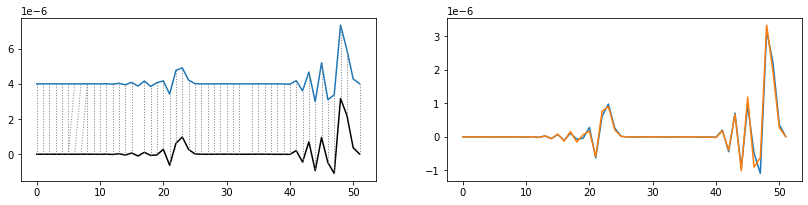

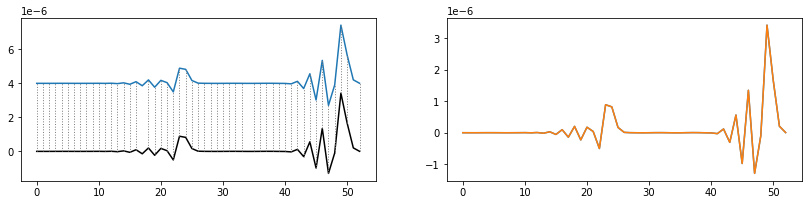

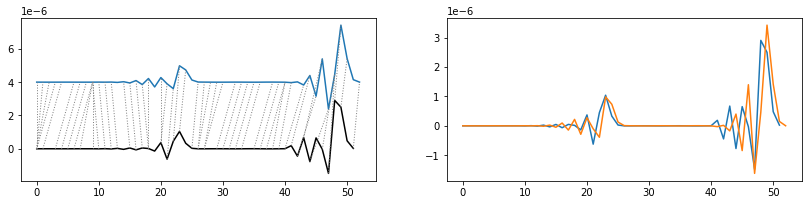

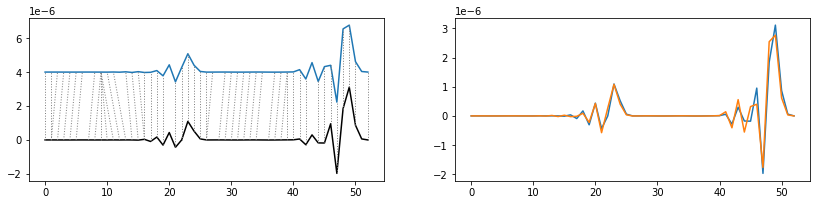

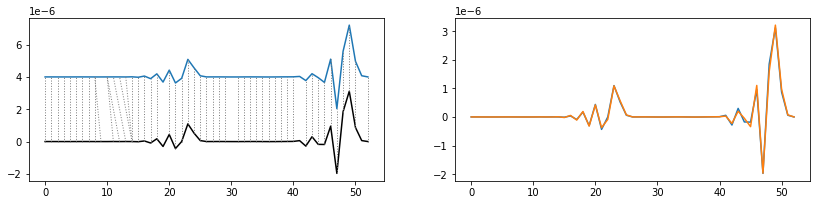

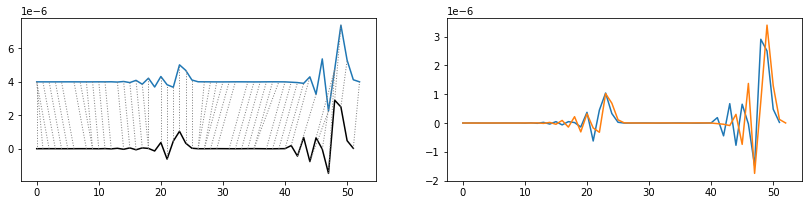

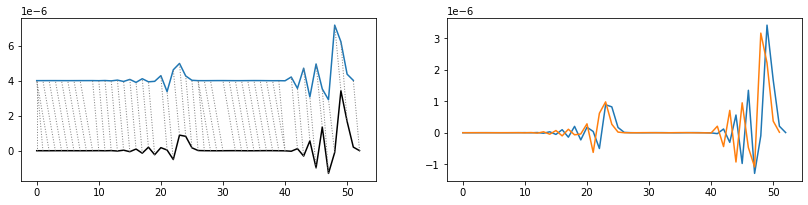

In [21]:
if __name__=='__main__':
    labels_l_0_train, labels_l_0_test, signals_l_0_train, signals_l_0_test = std_data(0)
    labels_l_1_train, labels_l_1_test, signals_l_1_train, signals_l_1_test = std_data(0.1)

    extract_dtw(signals_l_0_train,labels_l_0_train, 1, 43)

    # extract_dtw(signals_l_0_train,labels_l_0_train, 1, 4321)